**IMPORTINGTHE REQUIRED PACKAGES**


In [0]:
import numpy as np
from keras.datasets import cifar10
import cv2
import keras as k
from keras import models
from matplotlib import pyplot as p
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential,Model
from keras import optimizers
from keras.layers import LeakyReLU
from keras.layers import Dense, Dropout, Activation, Flatten,BatchNormalization
from keras.layers import Conv2D, MaxPooling2D,GlobalAveragePooling2D
from keras.applications.xception import Xception
from keras.applications import VGG16
import pandas as pd


Using TensorFlow backend.


**LOADING REQUIRED DATA**

In [0]:

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

data_train = np.zeros((50000, 71,71,3))
data_test = np.zeros((10000,71,71,3))



170500096/170498071 [==============================] - 33s 0us/step


**RESIZING DATA AS PER REQUIREMENTS OF THE XCEPTION MODULE**

In [0]:

for i, img in enumerate(x_train):

    im = np.transpose(img, (1,0,2))

    large_img = cv2.resize(im, dsize=(71,71),interpolation =cv2.INTER_CUBIC)

    data_train[i] = np.transpose(large_img, (1,0,2))



for i, img in enumerate(x_test):

    im = np.transpose(img, (1,0,2))

    large_img = cv2.resize(im, dsize=(71,71),interpolation =cv2.INTER_CUBIC)

    data_test[i] = np.transpose(large_img, (1,0,2))


**DATA PREPROCESSING**

In [0]:

# Data Preprocessing
y_train = k.utils.to_categorical(y_train, 10)
y_test = k.utils.to_categorical(y_test, 10)

# pixel values range from 0 to 255 - normalize
data_train = data_train.astype('float32')
data_test = data_test.astype('float32')

print(data_train.shape)
print(data_test.shape)


(50000, 71, 71, 3)
(10000, 71, 71, 3)


**USING PRETRAINED MODEL AS BASE MODEL**


*   Pretrained Model: Xception Network



In [0]:
nTrain = 10000
#datagen = ImageGenerator(rescale=1.0/255)
#train_features  = np.zeros()
base_model = Xception(weights='imagenet',include_top= False ,input_shape=(71,71,3))
# Model structure
base_model.summary()


Instructions for updating:
Colocations handled automatically by placer.
83689472/83683744 [==============================] - 3s 0us/step
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 71, 71, 3)    0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 35, 35, 32)   864         input_1[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, 35, 35, 32)   128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, 35, 35, 32)   0           block1

**ADDING CIFAR DATA VALUES TO THE PRE-EXISTING MODEL STRUCTURE**

In [0]:

x_train = base_model.predict(data_train)
x_val = base_model.predict(data_test)
print(x_train.shape)
print(x_val.shape)
  




(50000, 3, 3, 2048)
(10000, 3, 3, 2048)


**ADDING LAYERS ON TOP OF PRETRAINED MODEL: CUSTOMIZING MODEL**


running

In [0]:
model = models.Sequential()
model.add(Dropout(0.3))
model.add(Dense(512))
model.add(LeakyReLU(alpha=0.1))
model.add(Flatten())
model.add(Dense(512))
model.add(LeakyReLU(alpha=0.1))
model.add(Dense(10,activation='softmax'))
opt = optimizers.SGD(lr=.0001)
model.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['accuracy'])


In [0]:
model = models.Sequential()
model.add(Dropout(0.3))
model.add(Dense(512))
model.add(LeakyReLU(alpha=0.1))
model.add(Flatten())
model.add(Dense(512))
model.add(Dropout(0.1)

#model.add(Activation('tanh'))
#model.add(LeakyReLU(alpha=0.1))
model.add(Dense(10))
model.add(activation='softmax')
opt = optimizers.SGD(lr=.0001)
model.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['accuracy'])



SyntaxError: ignored

**MODEL TRAINING** 

In [0]:
fit_m =model.fit(x_train,y_train, batch_size=32, epochs=150,validation_data=(x_val,y_test),shuffle=True)


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
Train on 50000 samples, validate on 10000 samples
Epoch 1/150
50000/50000 [==============================] - 17s 350us/step - loss: 4.6863 - acc: 0.1952 - val_loss: 1.9839 - val_acc: 0.2961
Epoch 2/150
50000/50000 [==============================] - 16s 318us/step - loss: 2.3182 - acc: 0.2412 - val_loss: 1.9641 - val_acc: 0.2873
Epoch 3/150
50000/50000 [==============================] - 16s 320us/step - loss: 2.1702 - acc: 0.2624 - val_loss: 1.8829 - val_acc: 0.3443
Epoch 4/150
50000/50000 [==============================] - 16s 319us/step - loss: 2.1009 - acc: 0.2771 - val_loss: 1.8392 - val_acc: 0.3642
Epoch 5/150
50000/50000 [==============================] - 16s 318us/step - loss: 2.0473 - acc: 0.2924 - val_loss: 1.8386 - val_acc: 0.3583
Epoch 6/150
50000/50000 [==============================] - 16s 317us/step - loss: 2.014

**MODEL PERFORMANCE EVALUATION**

In [0]:
scores = model.evaluate(x_val, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
print("Loss:" , scores[0])
  

acc: 46.52%
Loss: 1.5251559171676636


**VISUALIZING MODEL PERFORMANCE**

In [0]:
def plot_modelacc(fit_model):
    with p.style.context('ggplot'):
            p.plot(fit_model.history['acc'])
            p.plot(fit_model.history['val_acc'])
            p.title("MODEL ACCURACY")
            p.xlabel("# of EPOCHS")
            p.ylabel("ACCURACY")
            p.legend(['train', 'test'], loc='upper left')
    return p.show()

In [0]:
def plot_model_loss(fit_model):
    with p.style.context('ggplot'):
            p.plot(fit_model.history['loss'])
            p.plot(fit_model.history['val_loss'])
            p.title("MODEL LOSS")
            p.xlabel("# of EPOCHS")
            p.ylabel("LOSS")
            p.legend(['train', 'test'], loc='upper left')
    return p.show()

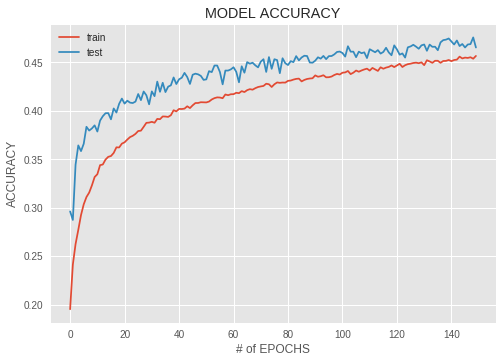

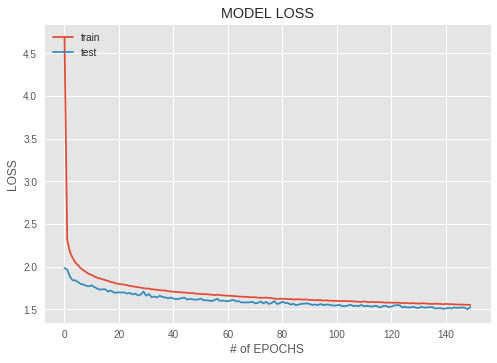

In [0]:
plot_modelacc(fit_m)
plot_model_loss(fit_m)